# Supervised bias analysis CUB data 2019
#### Plots used for report *Addendum Bias prevented*

This notebook is used to answer the following questions about the CUB process in 2019:

* Question 5: What was the distribution of students with a migration background who appealed DUO's decision in 2019?

In the introduction of this notebook the data is loaded and prepared. Thereafter, the question is answered.

In [1]:
import warnings
import numpy as np
import pandas as pd
from helper_functions import *
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import MaxNLocator

warnings.filterwarnings('ignore')

# Part 1 - Load and clean data

In [2]:
# loading data 
sheet_name = 'Table 6'
df = pd.read_excel('../DUO_CUB_Netherlands_Statistics.xlsx', sheet_name=sheet_name, skiprows=3)

In [3]:
# delete '\n' and 'number' for each columns
df.columns = [col.replace('\n', '').replace('number', '').replace('()', '').strip() for col in df.columns]

# delete last two columns
df = df[:-2]

# make category columns the index column, delete Nr column
df.set_index('Category', inplace=True)
df.drop('Nr', axis=1, inplace=True)
df.head()

,Total,Country of birth:Born in NL,Country of birth:Born outside NL,Country of origin: NL,Country of origin:Europe (excl. NL),Country of origin:Outside Europe,Born in NL x country of origin NL,Born in NL x country of origin Europe (excl. NL),Born in NL x country of origin outside Europe,Born outside NL x country of origin Europe (excl. NL),Born outside NL x country of origin outside Europe
Category,,,,,,,,,,,
Total,280.0,230.0,50.0,50.0,10.0,230.0,50.0,10.0,180.0,0.0,50.0
Education: mbo 1-2,70.0,40.0,30.0,10.0,0.0,60.0,10.0,0.0,40.0,0.0,30.0
Education: mbo 3-4,210.0,180.0,20.0,40.0,10.0,160.0,40.0,10.0,140.0,0.0,20.0
Education: hbo,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0
Age: 15-18 years,80.0,80.0,10.0,20.0,0.0,60.0,20.0,0.0,60.0,0.0,10.0


In [4]:
# check missing values
df.isnull().sum()

Total                                                    0
Country of birth:Born in NL                              0
Country of birth:Born outside NL                         0
Country of origin: NL                                    0
Country of origin:Europe (excl. NL)                      0
Country of origin:Outside Europe                         0
Born in NL x country of origin NL                        0
Born in NL x country of origin Europe (excl. NL)         0
Born in NL x country of origin outside Europe            0
Born outside NL x country of origin Europe (excl. NL)    0
Born outside NL x country of origin outside Europe       0
dtype: int64

### Define new groups

In [5]:
# get number of columns except the first one, also get number of rows
n_col = len(df.columns) - 1
n_row = len(df)

# Columns - 3 categories
df['Migrants'] = df['Country of birth:Born outside NL']
df['Childs of migrant'] = df['Born in NL x country of origin Europe (excl. NL)'] + df['Born in NL x country of origin outside Europe']
df['Dutch origin'] = df['Born in NL x country of origin NL']

# Columns - 5 categories
## Migrants (1st gen)
df['Non-European migrants'] = df['Born outside NL x country of origin outside Europe']
df['European migrants'] = df['Born outside NL x country of origin Europe (excl. NL)']

## Childs of migrant(s) (2nd gen)
df['Childs non-European migrant'] = df['Born in NL x country of origin outside Europe']
df['Childs European migrant'] = df['Born in NL x country of origin Europe (excl. NL)']

## All migrants (total population without Dutch origin)
df['Migration background'] = df['Migrants'] + df['Childs of migrant']

## EU and non-EU migrants 
df['Non-European migration background'] = df['Born outside NL x country of origin outside Europe'] + df['Born in NL x country of origin outside Europe']
df['European migration background'] = df['Born outside NL x country of origin Europe (excl. NL)'] + df['Born in NL x country of origin Europe (excl. NL)']

### Groups of interest

In [6]:
# entire population
year = 2019
total_pop = ['Total']
n_total_pop = '{:,}'.format(int(df.loc['Total','Total'])).replace(',','.')

# migrants, childs of migrant and Dutch origin 
col_mig = ['Migrants', 'Childs of migrant', 'Dutch origin']

# migration background and Dutch origin
col_mig_binary = ['Migration background', 'Dutch origin']

# EU migrants, non-EU migrants and Dutch origin
col_mig_eu = ['Non-European migration background', 'European migration background', 'Dutch origin']

# all migrant categories
col_mig_all = ['Non-European migrants', 'European migrants', 'Childs non-European migrant', 'Childs European migrant', 'Dutch origin']

### Color template


In [7]:
## type 1

# migrants (brown)
c_migr = '#843C38'

# childs of migrant (light red)
c_child_migr = '#FB7F72'

# migration background - migrants and childs of migrant (red)
c_migr_and_child_migr = '#E72822'

## type 2

# EU migrants (light orange) 
c_migr_eu = '#F6C6AD'

# childs of EU migrant (light purple)
c_child_migr_eu = '#E59EDD' 

# EU migrants and childs of EU migrant (blue)
c_migr_eu_and_child_migr_eu = '#005AA8'

## type 3

# non-EU migrants (orange) 
c_migr_non_eu = '#E97132'

# childs of non-EU migrant (purple)
c_child_migr_non_eu = '#A02B93' 

# non-EU migrants and childs of non-EU migrant (turquoise)
c_migr_non_eu_and_child_migr_non_eu = '#7DC9CA'

# Dutch (grey)
c_NL = '#d3d2cc'

## color groups
c_mig = [c_migr, c_child_migr, c_NL]
c_mig_binary = [c_migr_and_child_migr, c_NL]
c_mig_eu = [c_migr_non_eu_and_child_migr_non_eu, c_migr_eu_and_child_migr_eu, c_NL]
c_mig_all = [c_migr_non_eu, c_migr_eu, c_child_migr_non_eu, c_child_migr_eu, c_NL]

# Question 5: What was the distribution of students with a migration background who appealed DUO's decision in 2019?

## 2 groups: migration background and Dutch origin

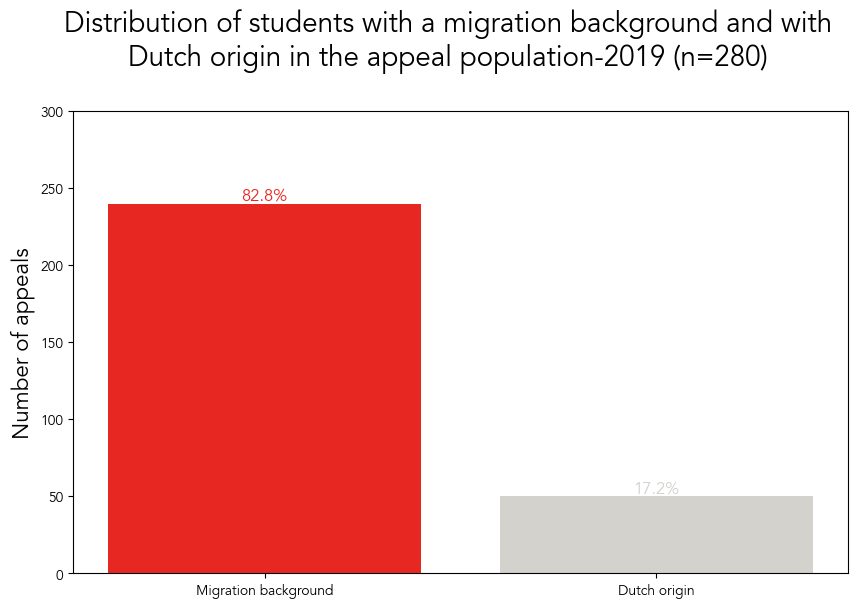

In [11]:
# data 
rows = total_pop
columns = col_mig_binary

# colors
colors = c_mig_binary

# y-ticks
ylim = 300
n_yticks = 7

# y-axis label
yaxis_label = 'Number of appeals'

# figure title
figure_title = f'Distribution of students with a migration background and with\nDutch origin in the appeal population-{year} (n={n_total_pop})'

# plot function
data, fig, ax = create_barplot(df, 
                               rows, 
                               columns, 
                               colors, 
                               set_xticks=True, 
                               rotation_xtick_label=0,
                               position_xtick_label='center',
                               set_ylabel_percentage=False,
                               yaxis_by_thousands=True,
                               yaxis_small=True, 
                               set_ylabel=yaxis_label, 
                               bar_perc_annotation=True,
                               as_percentage_total=False, 
                               as_percentage_category=False, 
                               ylim =ylim,
                               n_yticks=n_yticks,
                               put_number_on_top_bar=False,
                               figure_title=figure_title)

# legend
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## 3 groups: (non-)European migration background and Dutch origin

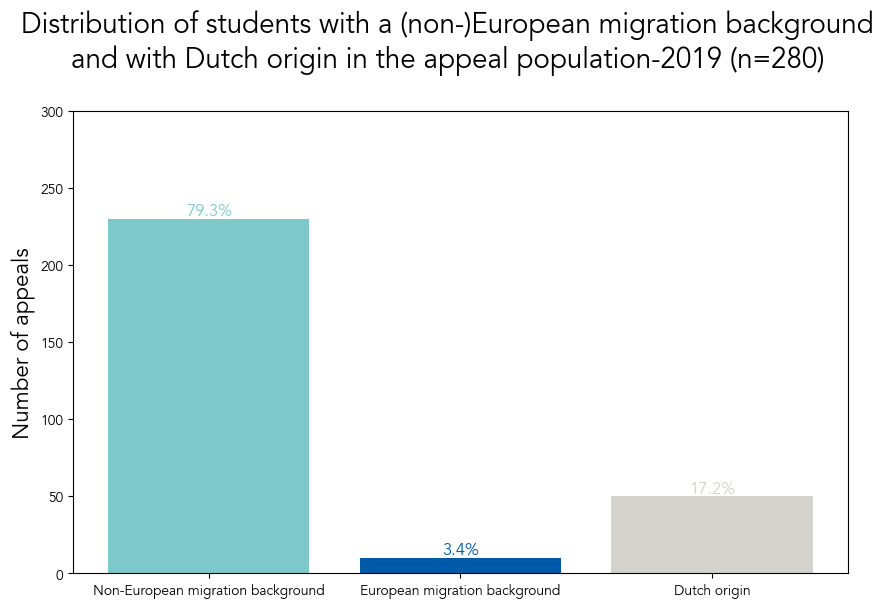

In [12]:
# data 
rows = total_pop
columns = col_mig_eu

# colors
colors = c_mig_eu

# y-ticks
ylim = 300
n_yticks = 7

# y-axis label
yaxis_label = 'Number of appeals'

# figure title
figure_title = f'Distribution of students with a (non-)European migration background\nand with Dutch origin in the appeal population-{year} (n={n_total_pop})'

# plot function
data, fig, ax = create_barplot(df, 
                               rows, 
                               columns, 
                               colors, 
                               set_xticks=True, 
                               rotation_xtick_label=0,
                               position_xtick_label='center',
                               set_ylabel_percentage=False,
                               yaxis_by_thousands=True,
                               yaxis_small=True, 
                               set_ylabel=yaxis_label, 
                               bar_perc_annotation=True,
                               as_percentage_total=False, 
                               as_percentage_category=False, 
                               ylim =ylim,
                               n_yticks=n_yticks,
                               put_number_on_top_bar=False,
                               figure_title=figure_title)

# legend
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## 5 groups: (non-)European migrants, childs of a (non-)European migrant and Dutch origin

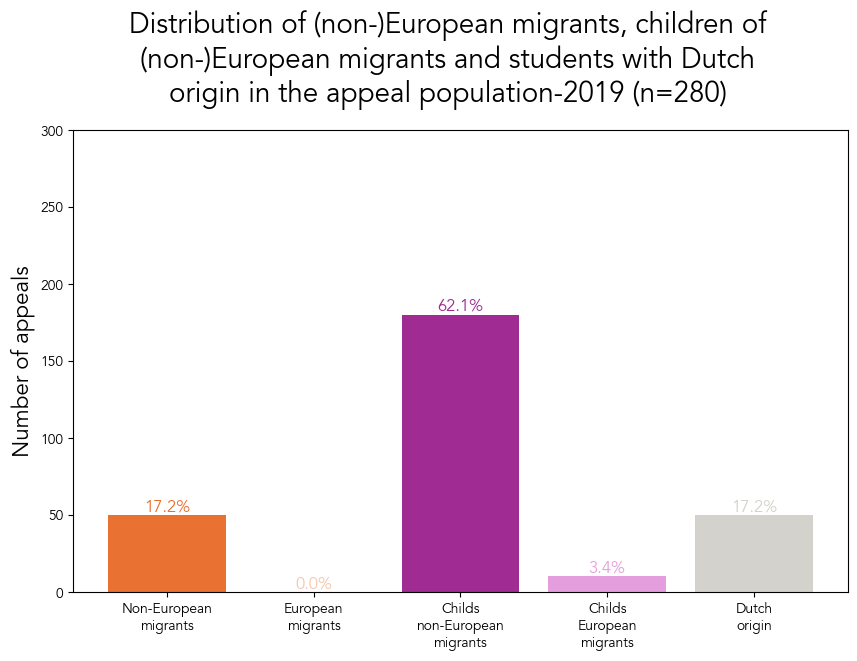

In [13]:
# data
rows = total_pop
columns = col_mig_all

# colors
colors = c_mig_all

# custom x-ticks
custom_xticks =['Non-European\nmigrants', 
                'European\nmigrants', 
                'Childs\nnon-European\nmigrants',
                'Childs\nEuropean\nmigrants',
                'Dutch\norigin']

# y-ticks
ylim = 300
n_yticks = 7

# y-axis label
yaxis_label = 'Number of appeals'

# figure title
figure_title = f'Distribution of (non-)European migrants, children of\n(non-)European migrant and students with Dutch\norigin in the appeal population-{year} (n={n_total_pop})'

# plot function
data, fig, ax = create_barplot(df, 
                               rows,
                               columns,
                               colors,
                               set_xticks=True, 
                               custom_xticks=custom_xticks,
                               rotation_xtick_label=0,
                               position_xtick_label='center',
                               set_ylabel_percentage=False,
                               set_ylabel=yaxis_label,
                               bar_perc_annotation=True,
                               yaxis_by_thousands=True,
                               yaxis_small=True,  
                               ylim =ylim,
                               n_yticks=n_yticks,
                               as_percentage_total=False, 
                               as_percentage_category=False,  
                               figure_title=figure_title,
                               y_title=1.08)

# legend
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()